In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\cherr\Downloads\Ecommerce_return\Train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df.shape

(10999, 12)

In [8]:
df.columns.tolist()

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [9]:
df.drop(columns=['ID'],inplace=True)

In [10]:
#Creating the returned column
#0 = Late Delivery = Returned 
# 1= Ontime = Not Returned
df['returned']  =df['Reached.on.Time_Y.N'].apply(lambda x :1 if x ==0 else 0)

In [12]:
#Checking the missing values 
print(df.isnull().sum())

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
returned               0
dtype: int64


In [13]:
#Handle categorical data
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


In [14]:
#Overview after cleaning 
df.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,returned
0,d,flight,4,2,177,3,low,f,44,1233,1,0
1,f,flight,4,5,216,2,low,m,59,3088,1,0
2,a,flight,2,2,183,4,low,m,48,3374,1,0
3,b,flight,3,3,176,4,medium,m,10,1177,1,0
4,c,flight,2,2,184,3,medium,f,46,2484,1,0


In [15]:
df.to_csv("Train_data_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Train_data_cleaned.csv'")


Cleaned dataset saved as 'Train_data_cleaned.csv'


In [17]:
print("\nReturn Rate Summary:")
print(df['returned'].value_counts(normalize=True) * 100)


Return Rate Summary:
returned
0    59.669061
1    40.330939
Name: proportion, dtype: float64


In [29]:
# ===============================
#      Return % Analysis
# ===============================

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\cherr\Documents\Train_data_cleaned.csv")

In [22]:
#Define Analysis_features
Analysis_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']

In [23]:
#Return % by each feature
for feature in Analysis_features:
    print(f"\n Return % by {feature.title()}:")
    summary = (
        df.groupby(feature)['returned']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )
    summary['Return_%'] = (summary['returned'] * 100).round(2)
    print(summary)


 Return % by Warehouse_Block:
  Warehouse_block  returned  Return_%
0               a  0.413530     41.35
1               c  0.403164     40.32
2               d  0.402399     40.24
3               f  0.401528     40.15
4               b  0.397709     39.77

 Return % by Mode_Of_Shipment:
  Mode_of_Shipment  returned  Return_%
0             road  0.411932     41.19
1             ship  0.402439     40.24
2           flight  0.398424     39.84

 Return % by Product_Importance:
  Product_importance  returned  Return_%
0             medium  0.409550     40.95
1                low  0.407212     40.72
2               high  0.350211     35.02


In [24]:
# supplier proxy (Warehouse_block as supplier)
supplier_summary = (
    df.groupby('Warehouse_block')['returned']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
supplier_summary['Return_%'] = (supplier_summary['returned'] * 100).round(2)

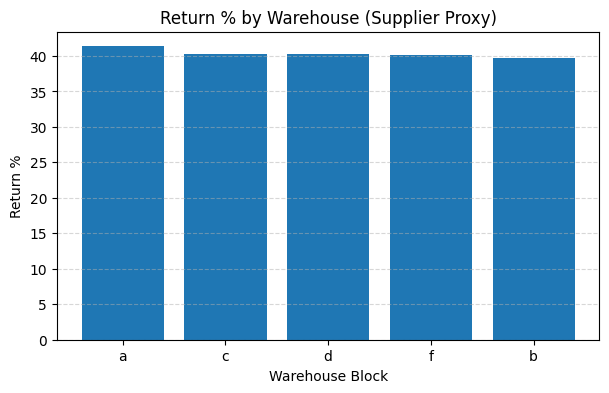

In [26]:
#Return % by Warehouse Block
plt.figure(figsize=(7,4))
plt.bar(supplier_summary['Warehouse_block'], supplier_summary['Return_%'])
plt.title('Return % by Warehouse (Supplier Proxy)')
plt.xlabel('Warehouse Block')
plt.ylabel('Return %')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

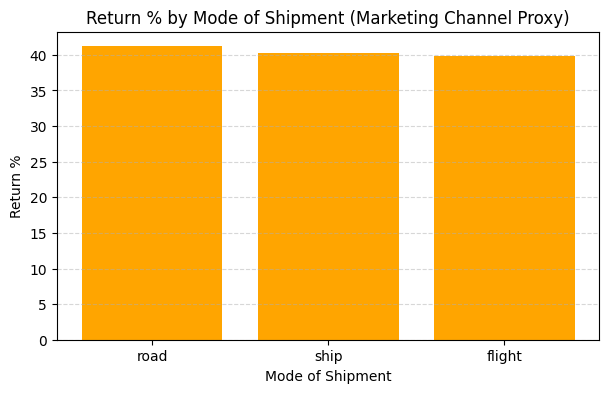

In [27]:
#Return % by Mode of Shipment
mode_summary = (
    df.groupby('Mode_of_Shipment')['returned']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
mode_summary['Return_%'] = (mode_summary['returned'] * 100).round(2)

plt.figure(figsize=(7,4))
plt.bar(mode_summary['Mode_of_Shipment'], mode_summary['Return_%'], color='orange')
plt.title('Return % by Mode of Shipment (Marketing Channel Proxy)')
plt.xlabel('Mode of Shipment')
plt.ylabel('Return %')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

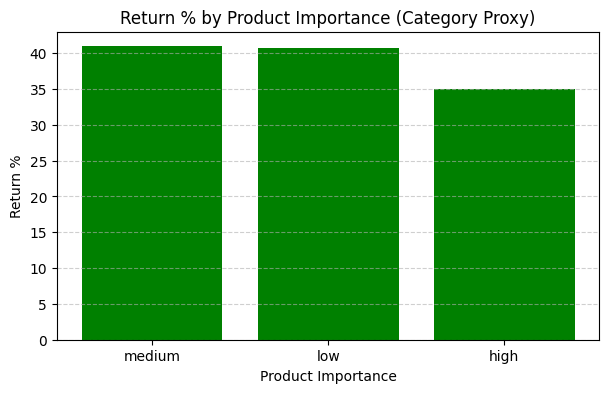

In [28]:
#Return % by Product Importance
prod_summary = (
    df.groupby('Product_importance')['returned']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
prod_summary['Return_%'] = (prod_summary['returned'] * 100).round(2)

plt.figure(figsize=(7,4))
plt.bar(prod_summary['Product_importance'], prod_summary['Return_%'], color='green')
plt.title('Return % by Product Importance (Category Proxy)')
plt.xlabel('Product Importance')
plt.ylabel('Return %')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [30]:
#Export all summaries
supplier_summary.to_csv("return_by_warehouse.csv", index=False)
mode_summary.to_csv("return_by_mode.csv", index=False)
prod_summary.to_csv("return_by_product.csv", index=False)

In [46]:
# ===============================
#   Predict Return Probability
# ===============================

In [34]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [35]:
#Load the cleaned dataset
df = pd.read_csv(r"C:\Users\cherr\Documents\Train_data_cleaned.csv")

In [36]:
#Define features and target
target = 'returned'
features = [
    'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
    'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
    'Product_importance', 'Discount_offered', 'Weight_in_gms'
]

X = df[features]
y = df[target]

In [37]:
#Separation of columns
num_cols = [
    'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
    'Prior_purchases', 'Discount_offered', 'Weight_in_gms'
]
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


In [38]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

In [39]:
model = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [40]:
#Model Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
# Evaluation of model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ROC-AUC Score: 0.721

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      1641
           1       0.55      0.56      0.55      1109

    accuracy                           0.64      2750
   macro avg       0.62      0.62      0.62      2750
weighted avg       0.64      0.64      0.64      2750



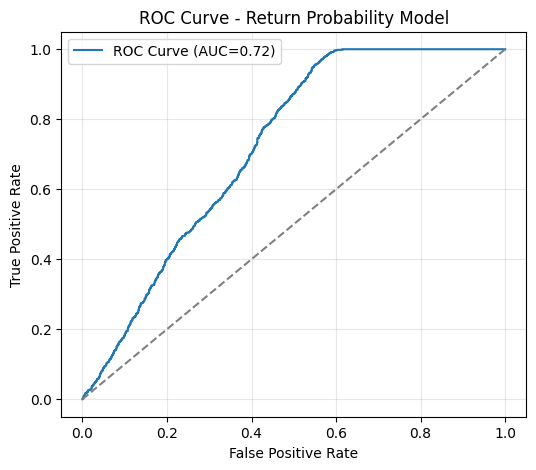

In [42]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='grey')
plt.title("ROC Curve - Return Probability Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [43]:
df['return_prob'] = model.predict_proba(X)[:, 1]

In [44]:
# Save the dataset
df.to_csv("Scored_returns.csv", index=False)

In [45]:
#Identify high-risk products (probability > 0.7)
high_risk = df[df['return_prob'] > 0.7]
high_risk.to_csv("high_risk_products.csv", index=False)

print(f"\nHigh-risk products saved as 'high_risk_products.csv' — {len(high_risk)} rows")


High-risk products saved as 'high_risk_products.csv' — 337 rows
